# Intro to Pandas

This notebook covers introductory tutorial to Pandas. The talk is given as a part of **Victoria Data Science Meetup** series. To know more details about the meetup group and follow/attend future events, please visit the following link - [**Victoria Data Science Meetup**](https://www.meetup.com/Victoria-Data-Science-Meetup/)


Let us dive in and import necessary modules

## Part 1: Load necessary modules (Environment Setup)

In [1]:
# Modules for handling the data
import pandas as pd
import numpy as np

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Helps in plotting figures inline
%matplotlib inline 

## Part 2: Import Data

In this stage we will load the data in the `./data/` folder. If you haven't downloaded the data yet, please do the following steps:
- Sign up to **[Kaggle](https://www.kaggle.com/)** 
- Join the **[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)** competition 
- Download the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) and accept the terms if prompted.
- Unzip the folder and copy the `train.csv, test.csv, data_description.txt` files to `./data/` folder.



Loading the data in Pandas is very easy. For this, we will be using [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). For more details about this method, please see the attached link. In short, the [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method loads the csv or any tabular/structured data into pandas data-frames. Pandas dataframes are quite similar to Python's dictionaries. Let us load the dataset and then we can play with the loaded data in the next section.

In [2]:
# Paths to the data
data_dir = './data/'
train_csv = data_dir + 'train.csv'
test_csv = data_dir + 'test.csv'

# Load data into pandas dataframe
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

# Save test_ID
test_ID = test['Id'].values

## Part 3: Playing with data

Thanks to Pandas! visualizing and playing with huge datasets is very easy with this library. In this section we will look into few functionalities of Pandas by playing with the dataset:

- Sneak Peek into dataset: `df.head()`, `df.tail()`, `df.iloc()`, `df.loc()`
- Shape of dataset: `df.shape`
- Know the features: `df.columns`
- General info about the dataset: `df.info()`
- Statistical characteristics of data: `df.describe()`
- Remove outliers

### Sneak Peek into dataset
In this part, we will be checking how our dataset will look like. In general, checking few examples on the dataset should give us an idea on how our dataset looks like. [`Pandas.DataFrame.head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) can print the first 5 examples of the dataset. We can also specify the number of examples from top we want to see.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# We can also use a number to tell how many examples we want to observe.
test.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


Similar to above [`Pandas.DataFrame.tail()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html) can print the last 5 examples of the dataset. We can also specify the number of examples from bottom we want to see.

In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test.tail(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In Pandas, we can select data by row and column numbers. This functionality can be achieved by [`Pandas.DataFrame.iloc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html). Let us see few examples on how to use `.iloc[]`

In [11]:
# Single selection of rows
train.iloc[0]                      # Row 0
train.iloc[102]                    # Row 102
train.iloc[-1]                     # Last Row

# Single selection of columns
train.iloc[:, 0]                   # Column 0
train.iloc[:, 9]                   # Column 9
train.iloc[:, -1]                  # Last Column

# Multiple columns and rows using iloc indexer
train.iloc[0:2, 1:3]               # Rows 0-1, Columns 1-2
# Indexing follows general python convention

,MSSubClass,MSZoning
0,60,RL
1,20,RL


The indexing feature of iloc can also be achieved with [`Pandas.DataFrame.loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). Additionally `.loc[]` can be used for selecting rows by labels, boolean and conditional lookup.

In [18]:
train.loc[[0,1], ['MSSubClass', 'MSZoning']]

,MSSubClass,MSZoning
0,60,RL
1,20,RL


In [19]:
train.loc[0:5, 'MSSubClass':'LotArea']

,MSSubClass,MSZoning,LotFrontage,LotArea
0,60,RL,65.0,8450
1,20,RL,80.0,9600
2,60,RL,68.0,11250
3,70,RL,60.0,9550
4,60,RL,84.0,14260
5,50,RL,85.0,14115


In [20]:
train.loc[train['Id']<5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


#### Shape of dataset

In Pandas, knowing the shape of dataset is similar to Numpy. If the shape of dataset is given as `M x N`, M is the number of examples and N is the number of features in our current data.

In [5]:
print("Size of the train data =", train.shape)
print("Size of the test data = {}".format(test.shape))

Size of the train data = (1460, 81)
Size of the test data = (1459, 80)


So we have 1460 examples given in train dataset and 1459 samples in test to predict. We can observe that there are 81 features in train dataset and 80 features in test dataset. The missing feature in the test is the feature we need to predict. Now let us check what features we have in our dataset.

#### Know the features

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

As we can see above, `df.columns` can give us the information about the current features in the dataset. More information about features can be known from `./data/data_description.txt`. Few things that we can do here are remove those features that are not needed. The feature `'Id'` is a unique id given to each example. We can remove this feature by using [`Pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [7]:
train.drop(columns=['Id'], axis=1, inplace=True)
test.drop(columns=['Id'], axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### General info about dataset

In this part, let us see some general information about the dataset.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

From above we can observe that there are 3 features with float64 type, 34 features with int64 type and 43 of type objects (strings). We can also see there are some NaNs in the dataset. We can get back to filling NaNs later.

#### Statistical characterisitics of data

The statistical characteristics of the features usually differ based on the feature type. Let us see some stats for different feature data-types.

In [9]:
train.describe(include=['int64', 'float64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Remove outliers

In this part, we will remove outliers in our data.

C:\Users\srira\Anaconda3\envs\Intro2Pandas\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


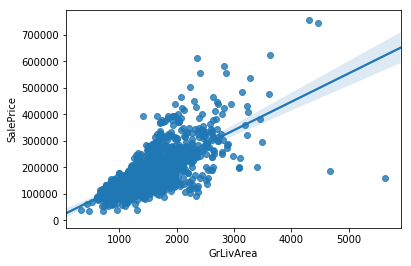

In [11]:
# Checking for outliers in GrLivArea as indicated in dataset documentation
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=True)
plt.show()

We can clearly see that there are two outliers in the bottom right corner which can interfere with our regression models. Let us remove them.

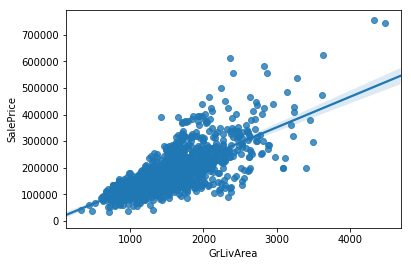

In [12]:
# Removing two very extreme outliers in the bottom right hand corner
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Recheck
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=True)
plt.show()

#### Correlation between features

We will use `df.corr()` to get the correlation between features, and use seaborn to visualize it. The correlation matrix can help us to visualize how each feature is correlated to `SalePrice` of the house

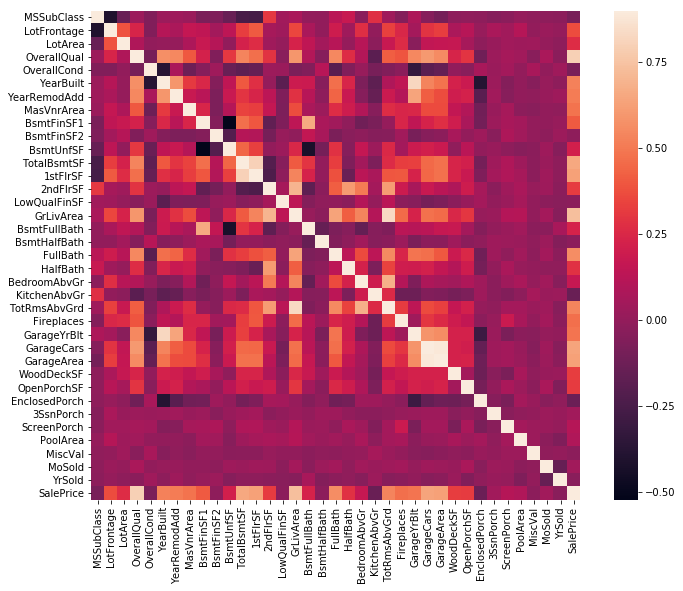

In [13]:
corr_mat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, square=True)

## Part 4: Feature Engineering

In this part, let us modify and tweak the features such that we can come with features that are suitable to train a ML model.

In [14]:
# Place holders for train and test data size
num_train = train.shape[0]
num_test = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test), sort=False).reset_index(drop = True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("Shape of all_data = {}".format(all_data.shape))

Shape of all_data = (2917, 79)


#### Fill the missing data

In this part, we will check the percentage of missing values and fill them with either mean/median/mode/None based on the type of feature. We might also remove certain features that doesn't add value. And change data-types of features to more suitable types.

In [15]:
# Check for NaN values and compute the percentage for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# Drop the features that have 0 NaN values & sort the rest
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

# Print the results
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

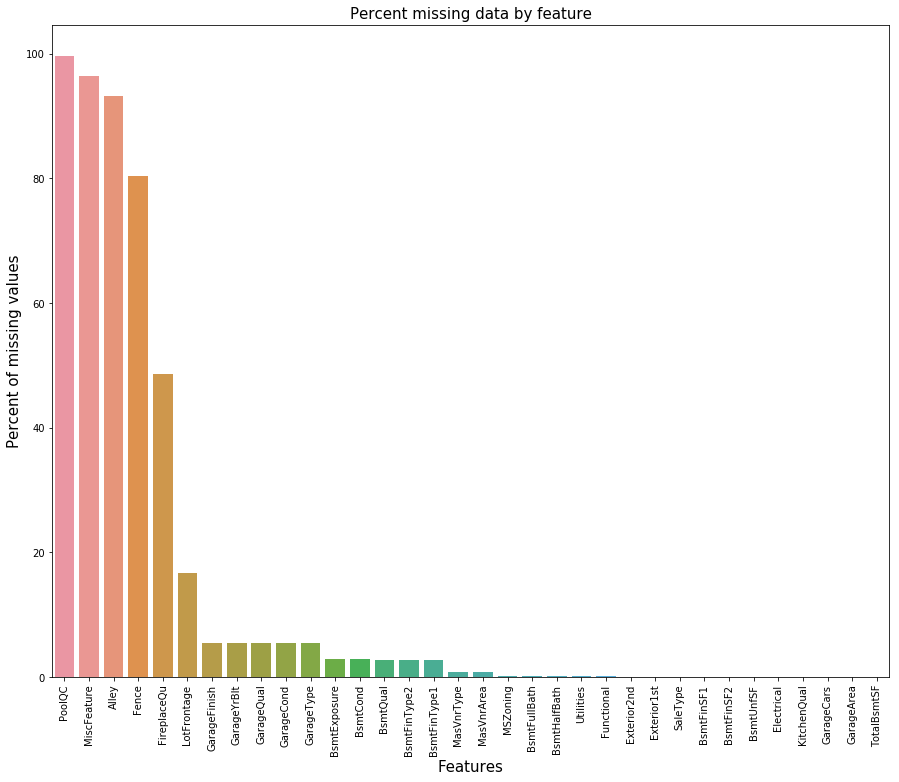

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Imputing missing values

Let us impute by proceeding through each feature sequentially.

- **PoolQc** - NA means 'No pool'. Majority of houses usually don't have pool.
- **MiscFeature** - NA means 'No Misc Feature'.
- **Alley** - NA means 'No Alley access'.
- **Fence** - NA means 'No Fence'
- **FireplaceQu** - NA means 'No Fire place'
- Similarly fill NA with 'None' for **GarageType**, **GarageFinish**, **GarageQual** and **GarageCond**.
- **GarageYrBlt**, **GarageArea** and **GarageCars**: Replace NA with 0. No garage = no cars.
- **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath** and **BsmtHalfBath**: Missing values are 0 for no basement.
- **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1** and **BsmtFinType2**: Categorical basement values. NaN means no basement.
- **MasVnrType**: NA means 'No Masonry veneer'.
- **MasVnrArea**: Area is 0 for NA MasVnrType.
- **MSSubClass** : NA (most likely) means No building class. We can replace missing values with None
- **Functional**: Data description says NA means typical('Typ')

In [17]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)
    
all_data['Functional'] = all_data['Functional'].fillna('Typ')

Now let us see few more features that are tricky than just filling with None (or) 0.

- **MSZoning** (The general zoning classification): 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
- **Electrical**: It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
- **Exterior1st** and **Exterior2nd**: Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
- **SaleType**: Fill in with most frequent value "WD"

In [18]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the **median** LotFrontage of the neighborhood.

In [19]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
                          lambda x: x.fillna(x.median()))

- **Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [20]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [21]:
# Check for NaN values and compute the percentage for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# Drop the features that have 0 NaN values & sort the rest
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

# Print the results
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


Now we have removed all the NaN values from the dataset. Now, let us do some feature transformations. Feature transformation refers to changing datatypes of the features(Int to String, String to Int, etc.).


### Dealing with Categorical features
Features such as **MSSubClass**(The building class), **OverallCond** (Overall condition of the house), **YrSold**(Year sold), and **MoSold**(Month Sold) are actually categorical.

In [22]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    all_data[col] = all_data[col].apply(str)

In [23]:
from sklearn.preprocessing import LabelEncoder


cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 
        'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 
        'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

# Apply label encoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [24]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal


### Adding new feature(s)

In this block, we will see how to add new feature(s) to the pandas dataframe.

Area related features are very important to determine house prices. So we add one more feature which is the total area of basement, first and second floor areas of each house.

In [25]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## (Advanced) Dealing with Skewed Features!!!

C:\Users\srira\Anaconda3\envs\Intro2Pandas\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180932.92 and sigma = 79467.79



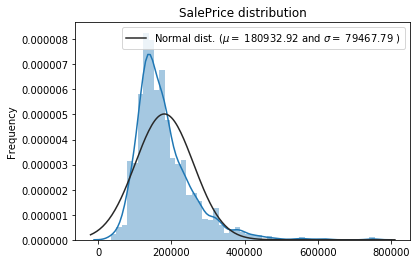

In [26]:
from scipy.stats import norm
(mu, sigma) = norm.fit(y_train)

# Plot Sale Price
sns.distplot(y_train , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

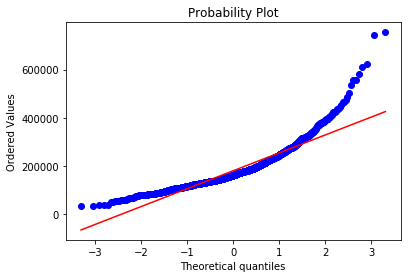

In [27]:
from scipy import stats

# Plot SalePrice as a QQPlot - finding the best-fit line to the data
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

The target variable 'SalePrice' is right skewed. We can use log(1+x) to convert it to normal distribution.


 mu = 12.02 and sigma = 0.40



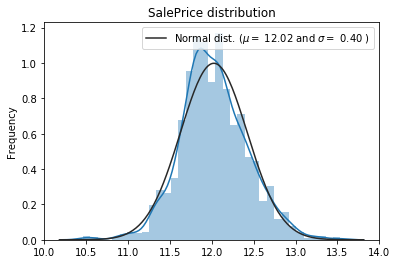

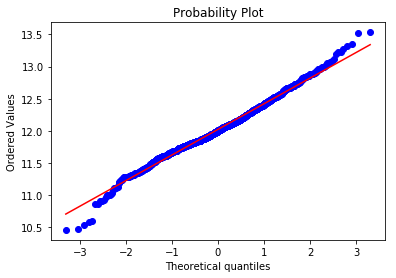

In [28]:
y_train = np.log1p(y_train)

(mu, sigma) = norm.fit(y_train)

# Plot Sale Price
sns.distplot(y_train , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot SalePrice as a QQPlot - finding the best-fit line to the data
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

Similarly, let us deal with other features in the data. We can use box-cox transform for the highly skewed features.

In [29]:
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [30]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


## Convert categorical variables to dummy variables

In [31]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

In [32]:
# Split train and test
train = all_data[:num_train]
test = all_data[num_train:]

In [33]:
train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


In [34]:
test.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,2.055642,6.221214,20.479373,0.730463,0.730463,1.540963,0.0,2.055642,2.055642,14.121376,...,0,0,0,1,0,0,0,0,1,0
1459,2.055642,6.244956,21.327220,0.730463,0.730463,0.000000,0.0,2.259674,2.055642,14.116605,...,0,0,0,1,0,0,0,0,1,0
1460,2.885846,6.073289,21.196905,0.730463,0.730463,0.000000,0.0,2.055642,1.820334,14.178149,...,0,0,0,1,0,0,0,0,1,0
1461,2.885846,6.172972,19.865444,0.730463,0.730463,0.000000,0.0,2.259674,2.055642,14.179714,...,0,0,0,1,0,0,0,0,1,0
1462,0.000000,5.093857,17.257255,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.170316,...,0,0,0,1,0,0,0,0,1,0


## Part 5: Machine Learning Model

In [35]:
#Validation function
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Model
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0469,                               
                             learning_rate=0.045, max_depth=3,                               
                             min_child_weight=1.7816, n_estimators=2500,                              
                             reg_alpha=0.4640, reg_lambda=0.8571,                              
                             subsample=0.5213, silent=1,                              
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1149 (0.0072)



In [36]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Model Training
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
print(rmsle(y_train, xgb_train_pred))

0.07835715004839083


In [37]:
# Predict Test and reproject to original prices
xgb_pred = np.expm1(model_xgb.predict(test))

# Setting up competition submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('house_price_predictions.csv',index=False)

# References
- Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- Forum 1: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
- Forum 2: https://www.kaggle.com/josh24990/simple-stacking-approach-top-12-score